# Default Prediction Based on the German Credit Data

**Source Information**: (https://openml.org/search?type=data&sort=runs&status=active&id=31)

In [1]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=0ed201467deee8969de8ecab80168a4b960f486ab591857c108fad3d775d1b17
  Stored in directory: /Users/alina/Library/Caches/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [34]:
import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load ARFF file
file_path = 'dataset_31_credit-g.arff'
with open(file_path, 'r') as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
 
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

# Explore Data

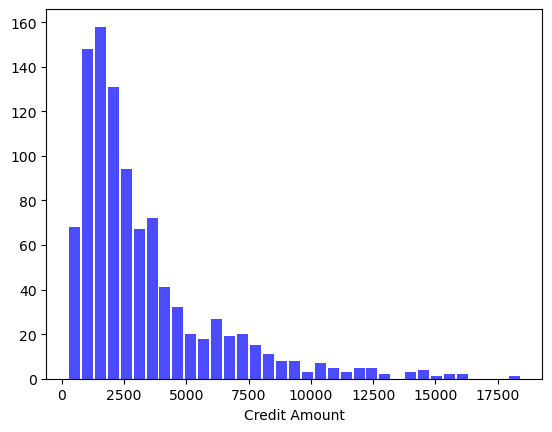

In [18]:
# Look at the distribution of credit amounts with a histogram
n, bins, patches = plt.hist(x=df['credit_amount'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Credit Amount")
plt.show()

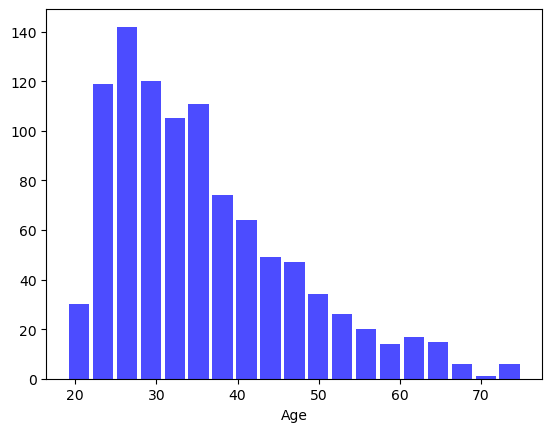

In [22]:
# Look at the borrower's age distribution
n, bins, patches = plt.hist(x=df['age'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Age")
plt.show()

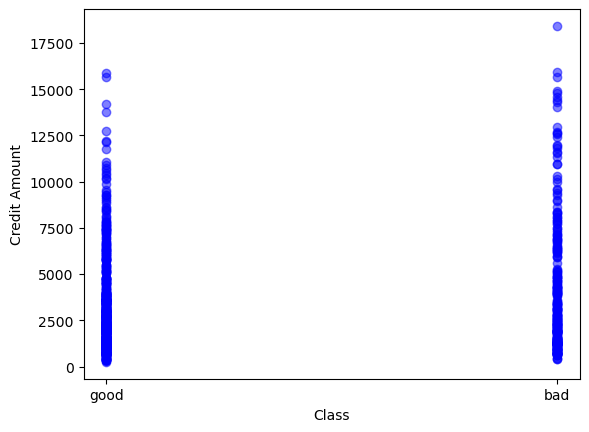

In [23]:
# Plot a scatter plot of credit amount against loan status
plt.scatter(df['class'], df['credit_amount'], c='blue', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Credit Amount')
plt.show()

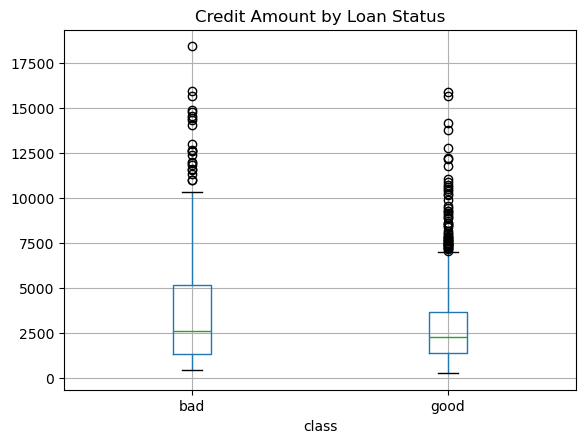

In [24]:
# Create a box plot of credit amount by loan status
df.boxplot(column = ['credit_amount'], by = 'class')
plt.title('Credit Amount by Loan Status')
plt.suptitle('')
plt.show()

In [25]:
# Create a cross table of the loan purpose and loan status
print(pd.crosstab(df['purpose'], df['class'], margins = True))

class                bad  good   All
purpose                             
business              34    63    97
domestic appliance     4     8    12
education             22    28    50
furniture/equipment   58   123   181
new car               89   145   234
other                  5     7    12
radio/tv              62   218   280
repairs                8    14    22
retraining             1     8     9
used car              17    86   103
All                  300   700  1000


In [26]:
# Create a cross table of the loan purpose and loan status
print(pd.crosstab(df['housing'], df['class'], margins = True))

class     bad  good   All
housing                  
for free   44    64   108
own       186   527   713
rent       70   109   179
All       300   700  1000


In [27]:
# Create a cross table of the loan purpose and loan status
print(pd.crosstab(df['personal_status'], df['class'], margins = True))

class               bad  good   All
personal_status                    
female div/dep/mar  109   201   310
male div/sep         20    30    50
male mar/wid         25    67    92
male single         146   402   548
All                 300   700  1000


In [30]:
# Create a cross table of the employment length and loan status
print(pd.crosstab(df['employment'], df['class'], margins = True))

class       bad  good   All
employment                 
1<=X<4      104   235   339
4<=X<7       39   135   174
<1           70   102   172
>=7          64   189   253
unemployed   23    39    62
All         300   700  1000


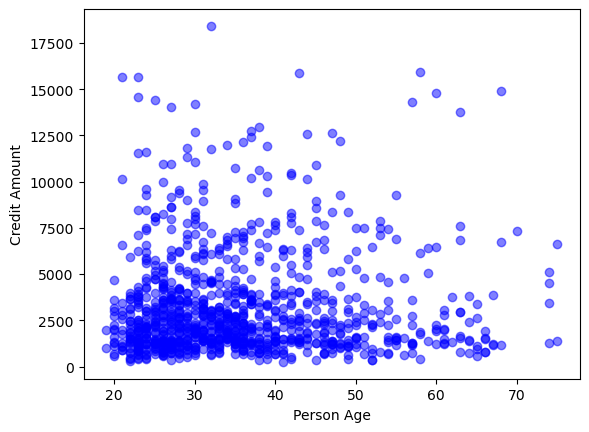

In [31]:
# Create the scatter plot for age and amount
plt.scatter(df['age'], df['credit_amount'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Credit Amount")
plt.show()

# One-Hot Encode Data

In [86]:
# Create two data sets for numeric and non-numeric data
df_num = df.select_dtypes(exclude=['object'])
df_str = df.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
df_str_onehot = pd.get_dummies(df_str)

for column in df_str_onehot.columns:
    df_str_onehot[column] = df_str_onehot[column].astype(int)

df_str_onehot.head()

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [87]:
# Merge the Class columns into one
df_str_onehot['class'] = df_str_onehot['class_bad']
df_str_onehot.head()

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good,class
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,1,0,1


In [88]:
df_str_onehot = df_str_onehot.drop(columns=['class_bad', 'class_good'])
df_str_onehot.head()

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [89]:
# Union the one-hot encoded columns to the numeric ones
df_prep = pd.concat([df_num, df_str_onehot], axis=1)

df_prep.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,1,0,...,0,0,1,0,0,1,0,0,1,1


# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = df_prep.drop(columns=['class']) 
y = df_prep[['class']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the intercept of the model
print(logistic_model.intercept_)

# Print the models coefficients
print(logistic_model.coef_)

[-0.19205446]
[[ 3.37816639e-02  1.20378456e-04  1.91749117e-01 -3.73490869e-02
  -1.63767777e-02 -2.49924035e-01 -1.11450222e-01  1.29147501e-01
   6.94820362e-01 -5.59850976e-02 -9.57994091e-01  2.14858707e-01
  -4.02763323e-01 -9.54834973e-02 -6.95138349e-02  1.62890621e-01
   3.15480277e-02  3.19100099e-02  1.01935401e-01  3.33128444e-02
   3.64411920e-01 -1.82850569e-02 -2.94071002e-01 -2.18450138e-03
  -3.94927397e-02 -3.99096229e-01  3.78469940e-02 -8.94613430e-02
   3.32824326e-01 -1.89480866e-01 -2.81740437e-01 -5.25659722e-02
  -2.99404892e-01  2.25132816e-01 -4.51198532e-02 -1.80534253e-02
   1.02988677e-01  7.96970567e-02 -1.31586805e-01 -2.41110255e-01
   7.87123721e-02 -7.03062425e-02 -1.98417456e-01 -2.18456570e-01
   4.02220056e-02  1.61710318e-01 -1.73487081e-01  2.40381637e-01
  -5.09801034e-01  7.94080699e-02  1.01084630e-01 -4.88575598e-01
   1.97479642e-01 -7.00246947e-02 -8.31912811e-02 -4.48371472e-04
  -3.63469789e-02  4.55776977e-02 -2.35589024e-01 -1.24743934e

/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicting Probability of a Bad Loan

In [101]:
# Create predictions of probability for loan status using test data
preds = logistic_model.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   class  prob_default
0      1      0.811653
1      1      0.537049
2      0      0.515590
3      1      0.734944
4      0      0.085879


# Default Classification Reporting

In [102]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['class'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['class'].value_counts())

# Print the classification report
target_names = ['Good', 'Bad']
print(classification_report(y_test, preds_df['class'], target_names=target_names))

class
0    292
1    108
Name: count, dtype: int64
              precision    recall  f1-score   support

        Good       0.80      0.86      0.83       273
         Bad       0.64      0.54      0.59       127

    accuracy                           0.76       400
   macro avg       0.72      0.70      0.71       400
weighted avg       0.75      0.76      0.75       400



# Visually Scoring the Credit Model

0.7575


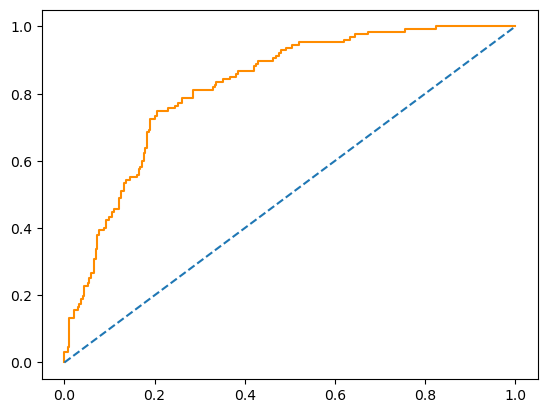

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create predictions and store them in a variable
preds = logistic_model.predict_proba(X_test)

# Print the accuracy score the model
print(logistic_model.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)